## **PART 1**
#### Building Scrapers
#### **CHAPTER 1**
#### Your First Web Scraper


*   Basics of sending GET request to web server
*   Reading HTML output from the page
*   Data extraction to isolate content we are looking for



#### Connecting

In [5]:
# text-wrap for notebook output
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [6]:
from urllib.request import urlopen
html=urlopen('https://pythonscraping.com/pages/page1.html')
print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


#### An Introduction to BeautifulSoup

*  from request module from urllib library import urlopen
*  Get HTML content by calling html.read()
*  Transform HTML content to BeautifulSoup object

In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/pages/page1.html")
bsObj=BeautifulSoup(html.read())
print(bsObj.h1)

# query below also creates the same output
'''
bsObj.html.body.h1
bsObj.body.h1
bsObj.html.h1
'''

<h1>An Interesting Title</h1>


In [10]:
print(bsObj)

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>



#### Connecting Reliably
*  prevent code execution from stopping unexpectedly
*  make sure page can be found
*  server can be found

In [5]:
# handle page not found, print out HTTP error
from urllib.request import urlopen
from urllib.error import HTTPError
try:
    html=urlopen('http://www.pythonscraping.com/pages/NO_SUCH_PAGE.html')
except HTTPError as e:
    print(e)

HTTP Error 404: Not Found


In [ ]:
# handle site not found
if html is None:
    print('URL is not found')
else:
    # program continues

In [ ]:
# handle non existing tag
'''
if AttributeError is returned means nonExistingTag doesn't have this tag OR 
nonExistingTag is a None object
''' 
try:
    badContent=bsObj.nonExistingTag.anotherTag
except AttributeError as e:
    print('Tag was not found')
else:
    if badContent==None:
        print('Tag was not found')
    else:
        print(badContent)

In [28]:
# Comprehensive query which takes in Exceptions into account

from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
def getTitle(url):
    try:
        html=urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj=BeautifulSoup(html.read())
        title=bsObj.body.h1
    except AttributeError as e:
        return None
    return title
title=getTitle("http://www.pythonscraping.com/pages/page1.html")
if title == None:
    print("Title could not be found")
else:
    print(title)


<h1>An Interesting Title</h1>


#### **CHAPTER 2**
#### Advanced HTML Parsing

#### Things to avoid
*  What if targe content is buried 20 tags deep in HTML?  
*  Avoid writing very specific which might break with the slightest change to the website  
*  What are the options?  
    * Look for "print this page" link/ mobile version of the site
    * Look for hidden info in JavaScript file
    * info might be available in URL itself
    * look for alternate sources


In [19]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/pages/warandpeace.html")
bsObj=BeautifulSoup(html)

In [27]:
# findAll to find all the span tags with class='green'
# get_text() to get the text portion of the tag
nameList=bsObj.findAll("span",{"class":"green"})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


#### find () and findAll()
*  findAll(tag, attributes, recursive, text, limit, keywords)  
*  find(tag, attributes, recursive, text, keywords)
*  tag: tag name
*  attribute: attribute of the tag
*  recursivee: boolean; True=look into chilcren and children's children, if False=look into top-level tags
*  text: match based on text content of the tags
*  limit: only for findAlll(); gives the first items on the page in order that they occur
*  keyword: select tag that contains particular attribute
* Note: attribute list is an 'or' filter whilst keyword is an 'and' filter

In [ ]:
# use of keyword
# this will give nonstandard use of class error because class is a protected keyword
bsObj.findAll(class='green') 

# instead use underscore
bsObj.findAll(class_='green')

# alternatively
bsObj.findAll("",{"class":"green"})

#### Other BeautifulSoup Objects
*  BeautifulSoup objects: bsObj
*  Tag objects: retrieve through find/findAll
*  NavigableString objects: represent text withing tags
*  Comment object: HTML comments

#### Navigating Trees
* findAll find tags based on their name and attribute
* how to find tag based on their location in the document? Use tree navigation

#### Dealing with children and other descendants
* Children: one tag below a parent
* Decendants: any level in the tree below a parent
* findAll() finds descendant
* .children finds children


In [32]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj=BeautifulSoup(html)

for child in bsObj.find("table",{"id":"giftList"}).children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


#### Dealing with siblings
* use next_sibling to get the next object
* previous_sibling is the opposite of next_sibling

In [36]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj=BeautifulSoup(html)

for sibling in bsObj.find("table",{"id":"giftList"}).tr.next_siblings:
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

#### Dealing with your parents
* parent-finding functions :
    * .parent
    * .parents

In [40]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html=urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj=BeautifulSoup(html)
print(bsObj.find("img",{"src":"../img/gifts/img1.jpg"
                       }).parent.previous_sibling.get_text())


$15.00



Explanation for query above:
1. image tag where src="../img/gifts/img1.jpg" is selected
2. parent of that image tag; td
3. previous_sibling of the parent td tag
4. get_text() on the sibling td tag

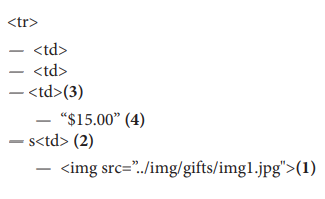

#### Regular expression (REGEX)
Examples below:
* aa* : a then a* (any number of a including 0)
* bbbb : five b's in a row
* (cc)* : any number of pairs of c's, including 0
* (d|): d or a space


Identifying email address: 
* Rule 1:  
    * First part contains at leas one of the following:
        * uppercase letters
        * lowercase letters
        * numbers 0-9
        * periods (.)
        * plus signs (+)
        * underscores (_)  

    * REGEX: [A-Za-z0-9\._+]+

* Rule 2:
    * contains @
    * REGEX: @

* Rule 3:
    * contains at least one uppercase and lowercase letter
    * REGEX: [A-Za-z]+
* Rule 4:
    * followed by a period (.)
    * REGEX: \.
* Rule 5:
    * Ends with:
        * .com
        * .org
        * .edu
        * .net
    * REGEX: (com|org|edu|net)


Concatenating all rules:
[A-Za-z0-9\._+\]+@[A-Za-z]+\.(com|org|edu|net)

#### Regular Expression and BeautifulSoup


In [43]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html=urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj=BeautifulSoup(html)
images=bsObj.findAll("img",{"src":re.compile("\.\./img\/gifts/img.*\.jpg")})
for image in images:
    print(image["src"])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


#### Accessing Attributes
* to get attribute of a tag: myTag.attrs
* Example:
to get the source location for an image
myImgTag.attrs

#### Lambda Expressions
* BeautifulSoup allows certain types of functions to be pass as parameters into findAll function
* Example:  
soup.findAll(lambda tag: len(tag.attrs) == 2)
* Explanation: 
find all tags that have 2 attributes

#### Beyond Beautifulsoup
There are other libraries other than BS: 
* lxml
* HTML Parser


#### *CHAPTER 3*
#### Starting to Crawl

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html=urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
bsObj=BeautifulSoup(html)
for link in bsObj.findAll("a"):
    if 'href' in link.attrs:
        print(link.attrs['href'])


/wiki/Wikipedia:Protection_policy#semi
#mw-head
#searchInput
/wiki/Kevin_Bacon_(disambiguation)
/wiki/File:Kevin_Bacon_SDCC_2014.jpg
/wiki/Philadelphia,_Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
#cite_note-1
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
/wiki/Wikipedia:Citation_needed
http://baconbros.com/
#cite_note-2
#cite_note-actor-3
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Balto_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(1982_film)
/wiki/Tremors_(1990_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/X-Men:_First_Class
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/w

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html=urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
bsObj=BeautifulSoup(html)
for link in bsObj.find("div",{"id":"bodyContent"}).findAll("a",
                        href=re.compile("^(/wiki/)((?!:).)*$")):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Kevin_Bacon_(disambiguation)
/wiki/Philadelphia,_Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Balto_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(1982_film)
/wiki/Tremors_(1990_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/Streaming_television
/wiki/I_Love_Dick_(TV_series)
/wiki/Golden_Globe_Award_for_Best_Actor_%E2%80%93_Television_Series_Musical_or_Comedy
/wiki/The_Guardian
/wi

In [10]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

random.seed(datetime.datetime.now())
def getLinks(articleUrl):
    html=urlopen("http://en.wikipedia.org"+articleUrl)
    bsObj=BeautifulSoup(html)
    return bsObj.find("div",{"id":"bodyContent"}).findAll("a",href=re.compile("^(/wiki/)((?!:).)*$"))
links=getLinks("/wiki/Kevin_Bacon")
while len(links)>0:
    newArticle=links[random.randint(0,len(links)-1)].attrs["href"]
    print(newArticle)
    links=getLinks(newArticle)

/wiki/Brian_Dennehy
/wiki/Frank_Langella
/wiki/Robert_Sean_Leonard
/wiki/Frank_Langella
/wiki/Screen_Actors_Guild_Award
/wiki/Apollo_13_(film)
/wiki/Box_Office_Mojo
/wiki/Neighbors_(app)
/wiki/Amazon_Product_Advertising_API
/wiki/Amazon_Affiliates
/wiki/Conflict_of_interest
/wiki/ISBN_(identifier)
/wiki/Library_of_Congress
/wiki/Government_Accountability_Office
/wiki/Historian_of_the_United_States_Senate
/wiki/Gavel#United_States_Congress_gavels
/wiki/Metonymy
/wiki/ISBN_(identifier)
/wiki/Magazine
/wiki/Article_(publishing)
/wiki/Academic_paper
/wiki/S2CID_(identifier)
/wiki/Journal_ranking
/wiki/Qualis
/wiki/Journal_ranking_by_country
/wiki/Web_of_Science
/wiki/Citation
/wiki/SSRN_(identifier)
/wiki/VG247
/wiki/Gameplanet
/wiki/Kinda_Funny
/wiki/Virtual_community
/wiki/Privacy_issues_of_social_networking_sites
/wiki/American_Library_Association
/wiki/American_Association_of_Law_Libraries
/wiki/Ohio_Library_Council
/wiki/Black_Caucus_of_the_American_Library_Association
/wiki/Public_Li

KeyboardInterrupt: ignored